In [17]:
from dgrec.utils import parse_genotypes, str_to_mut
from dgrec.analysis import mut_rate
from dgrec.plotting import plot_mutations
import os
import numpy as np
from Bio import SeqIO
import matplotlib.pyplot as plt
from dgrec.example_data import get_example_data_dir
import pandas as pd

In [18]:
sample_sheet=pd.read_csv("sample_sheet_out2.csv")
sample_sheet.head()

Sample_ID              Sample_Name  Sample_Plate  Sample_Well  \
0          1                TR_sacB_1           NaN          NaN   
1          2                TR_sacB_2           NaN          NaN   
2          3  SMAA_inactive_RT_ctrl_1           NaN          NaN   
3          4  SMAA_inactive_RT_ctrl_2           NaN          NaN   
4          5           AVD_deletion_1           NaN          NaN   

   Index_Plate_Well I7_Index_ID     index I5_Index_ID    index2  \
0               NaN        D715  TTAATCAG     UDI0001  AGCGCTAG   
1               NaN        D716  ACTGCTTA     UDI0001  AGCGCTAG   
2               NaN        D717  CGTAGCTC     UDI0001  AGCGCTAG   
3               NaN        D718  GCCTCTCT     UDI0001  AGCGCTAG   
4               NaN        D719  GCCGTAGG     UDI0001  AGCGCTAG   

            Sample_Project Description  \
0  DGRec_system_evaluation     VR-sacB   
1  DGRec_system_evaluation     VR-sacB   
2  DGRec_system_evaluation     VR-sacB   
3  DGRec_system_evaluation     VR-sacB   
4  DGRec_system_evaluation     VR-sacB   

                                          fastq_path  \
0  DGRec_system_evaluation/1/TR_sacB_1_S1_R1_001....   
1  DGRec_system_evaluation/2/TR_sacB_2_S2_R1_001....   
2  DGRec_system_evaluation/3/SMAA_inactive_RT_ctr...   
3  DGRec_system_evaluation/4/SMAA_inactive_RT_ctr...   
4  DGRec_system_evaluation/5/AVD_deletion_1_S5_R1...   

                                                 ref TR_orientation_gene  \
0  CGCCTTGGTAGCCATCTTCAGTTCCAGTGTTTGCTTCAAATACTAA...                 RVS   
1  CGCCTTGGTAGCCATCTTCAGTTCCAGTGTTTGCTTCAAATACTAA...                 RVS   
2  CGCCTTGGTAGCCATCTTCAGTTCCAGTGTTTGCTTCAAATACTAA...                 RVS   
3  CGCCTTGGTAGCCATCTTCAGTTCCAGTGTTTGCTTCAAATACTAA...                 RVS   
4  CGCCTTGGTAGCCATCTTCAGTTCCAGTGTTTGCTTCAAATACTAA...                 RVS   

  TR_orientation_reads  TR_start  TR_end mismatch_position  
0                  FWD        50     119               NaN  
1                  FWD        50     119               NaN  
2                  FWD        50     119               NaN  
3                  FWD        50     119               NaN  
4                  FWD        50     119               NaN

In [19]:
bases=list("ATGC")
data_path=get_example_data_dir()
sample_id=1
sample_name="TR_sacB_1"
gen_list=parse_genotypes(f"data/genotypes_raphael/{sample_id}-{sample_name}.tsv")

ref_seq=sample_sheet.loc[sample_sheet.Sample_Name==sample_name,"ref"].values[0]
#showing a few example lines
for g,n in gen_list[1:200:20]:
    print(n,"\t",g)

279 	 A91G
28 	 A68C
15 	 A72G,A79T,A91T
10 	 A61G,A72G
6 	 A61G,A68G
6 	 A68G,A76G,A91G
5 	 A61T,A79G
4 	 A86T
4 	 A72G,A76G,A86G,A91T
3 	 A61T,A76G,A91G


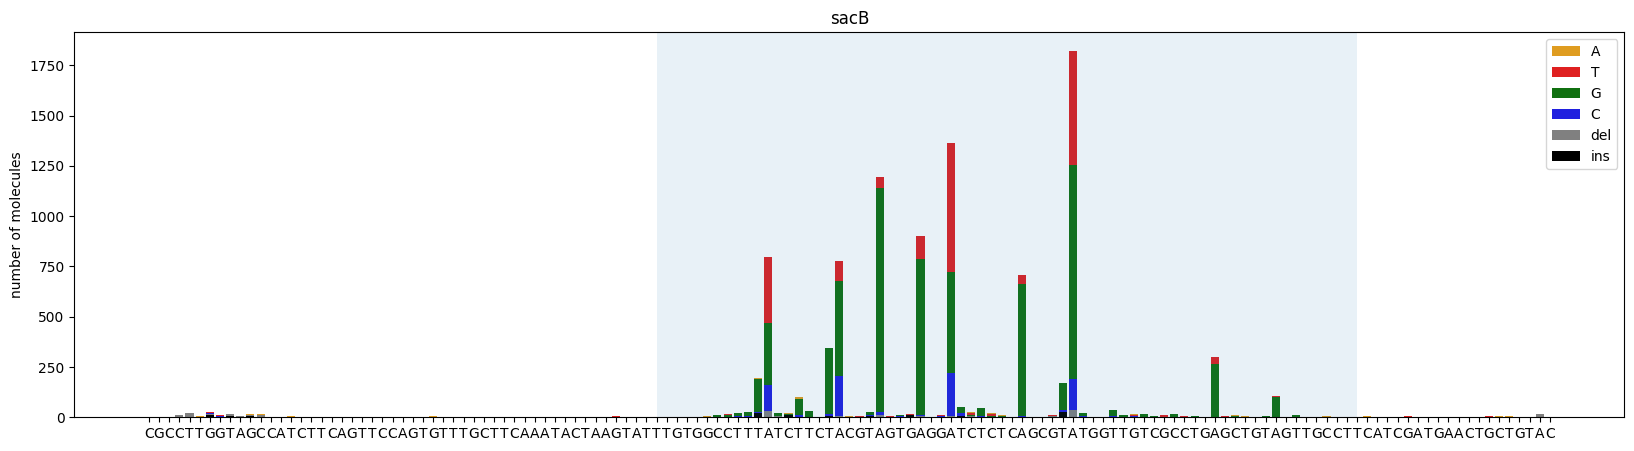

In [20]:
ax = plot_mutations(gen_list, ref_seq, sample_name="sacB", plot_range=[0,139], TR_range=[50,119])
plt.show()

## Distribution of the number of mutations per mutant genotype

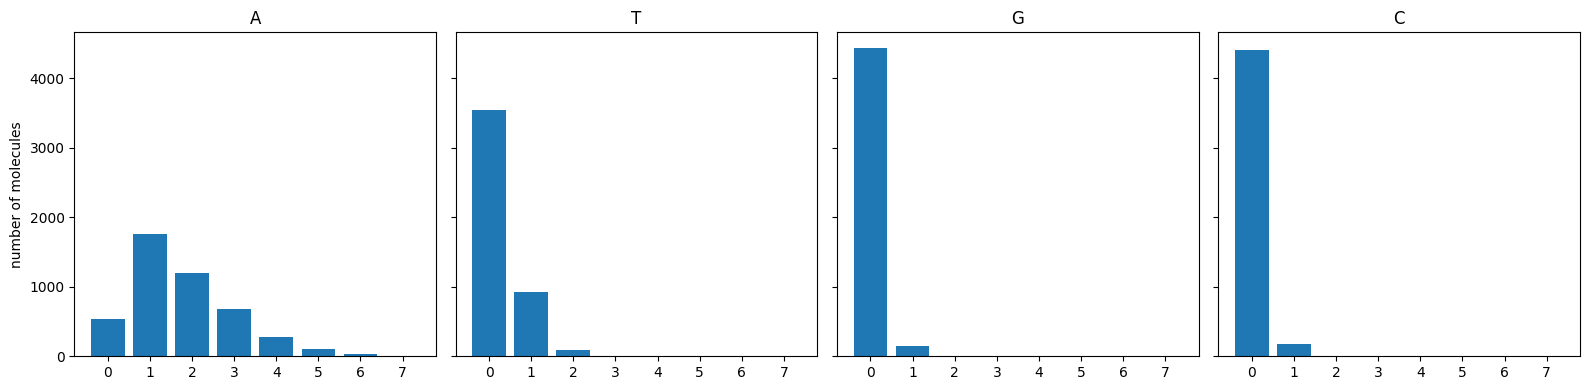

In [24]:
#converting genotype strings to lists
mutations=[[str_to_mut(gen[0]),gen[1]] for gen in gen_list[1:]] 

#Counting the number genotypes with c bases mutated for each possible base
bases="ATGC"
nN_mut=dict([(b,np.zeros(8)) for b in bases])
for g,n in mutations:
    mutated_bases=np.array(list(zip(*g))[0])
    for b in bases:
        c=np.sum(mutated_bases==b) #number of mutated bases that are adenines
        nN_mut[b][c]+=n

fig, axes = plt.subplots(1,4,figsize=(16,4), sharey=True)
axes[0].set_ylabel("number of molecules")
for i,b in enumerate(bases):
    axes[i].bar(range(8),nN_mut[b])
    axes[i].set_title(b)
    axes[i].set_xticks(range(8))
    

# Adjust layout
plt.tight_layout()
plt.show()